In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time # pour les sleep
import re # pour les expressions régulières

In [ ]:
prefixe_url = "https://www.fatsecret.fr" # Site sur lequel nous prenons nos informations

In [ ]:
url_bk = "https://www.fatsecret.fr/calories-nutrition/search?q=burger+king" # Donne les aliments de burger king
url_mcdo = "https://www.fatsecret.fr/calories-nutrition/search?q=mcdonald%27s" # Donne les aliments de Mcdonald's
url_kfc = "https://www.fatsecret.fr/calories-nutrition/search?q=kfc" # Donne les aliments de KFC

In [ ]:
page_bk = requests.get(url_bk)
page_mcdo = requests.get(url_mcdo)
page_kfc = requests.get(url_kfc)

In [ ]:
soup_bk = BeautifulSoup(page_bk.text, 'html.parser')
soup_mcdo = BeautifulSoup(page_mcdo.text, 'html.parser')
soup_kfc = BeautifulSoup(page_kfc.text, 'html.parser')

In [ ]:
tag_bk = soup_bk.find_all('table', class_ = "generic searchResult") # Récupère les produits de la première page de bk
print(tag_bk)

[<table class="generic searchResult">
<tr>
<td class="borderBottom">
<a class="prominent" href="/calories-nutrition/burger-king/frites-(moyenne)/1-portion">Frites (Moyenne)</a>  <a class="brand" href="/calories-nutrition/burger-king">(Burger King)</a>
<div class="smallText greyText greyLink">
										par 1 portion - Calories: 309kcal | Gras: 13,00g | Glu: 46,00g | Prot: 3,80g
										
										   <a href="/calories-nutrition/burger-king/frites-(moyenne)/1-portion">Valeurs Nutritives</a> - <a href="/calories-nutrition/search?q=Burger+King+Frites+(Moyenne)">Similaire</a>
</div>
</td>
</tr>
<tr>
<td class="borderBottom">
<a class="prominent" href="/calories-nutrition/burger-king/steakhouse-burger/1-portion">Steakhouse Burger</a>  <a class="brand" href="/calories-nutrition/burger-king">(Burger King)</a>
<div class="smallText greyText greyLink">
										par 1 portion (283g) - Calories: 829kcal | Gras: 51,00g | Glu: 54,00g | Prot: 37,00g
										
										   <a href="/calories-nutr

In [ ]:
urls_bk = soup_bk.find_all('a', class_ = "prominent") # Récupère les produits de la première page de bk
next_bk = soup_bk.find_all('span', class_ = "next") #récupère une balise contenant le lien de la page suivante
print(urls_bk)
print(next_bk)
print(next_bk[0].find('a').attrs['href'])

'''
minisoup = BeautifulSoup(next_bk, 'html.parser')
a = minisoup.find_all('a')
print(a.attrs['href'])
'''

[<a class="prominent" href="/calories-nutrition/burger-king/frites-(moyenne)/1-portion">Frites (Moyenne)</a>, <a class="prominent" href="/calories-nutrition/burger-king/steakhouse-burger/1-portion">Steakhouse Burger</a>, <a class="prominent" href="/calories-nutrition/burger-king/onion-rings-(6)/1-portion">Onion Rings (6)</a>, <a class="prominent" href="/calories-nutrition/burger-king/king-fries-cheese-bacon/1-portion">King Fries Cheese &amp; Bacon</a>, <a class="prominent" href="/calories-nutrition/burger-king/frites-(grande)/1-portion">Frites (Grande)</a>, <a class="prominent" href="/calories-nutrition/burger-king/chili-cheese-nugget/9-pieces">Chili Cheese Nugget </a>, <a class="prominent" href="/calories-nutrition/burger-king/king-nuggets/100g">King Nuggets</a>, <a class="prominent" href="/calories-nutrition/burger-king/cheeseburger/1-cheeseburger">Cheeseburger</a>, <a class="prominent" href="/calories-nutrition/burger-king/petite-frite/1-portion">Petite Frite</a>, <a class="prominen

"\nminisoup = BeautifulSoup(next_bk, 'html.parser')\na = minisoup.find_all('a')\nprint(a.attrs['href'])\n"

In [ ]:
for u in urls_bk:
    try:
        print(u.attrs['href'])
    except:
        pass

/calories-nutrition/burger-king/frites-(moyenne)/1-portion
/calories-nutrition/burger-king/steakhouse-burger/1-portion
/calories-nutrition/burger-king/onion-rings-(6)/1-portion
/calories-nutrition/burger-king/king-fries-cheese-bacon/1-portion
/calories-nutrition/burger-king/frites-(grande)/1-portion
/calories-nutrition/burger-king/chili-cheese-nugget/9-pieces
/calories-nutrition/burger-king/king-nuggets/100g
/calories-nutrition/burger-king/cheeseburger/1-cheeseburger
/calories-nutrition/burger-king/petite-frite/1-portion
/calories-nutrition/burger-king/chicken-louisiane-steakhouse/1-portion


In [ ]:
'''
liste_df = []

for u in urls_bk:
  page = requests.get(prefixe_url+u.attrs['href'])
  soup = BeautifulSoup(page.text, 'html.parser')
  macros = soup.find_all('div', class_ = "left") # Récupère les macros pour un produit : le nom puis la quantité
  #print(macros)
  string = ""
  cpt = 0

  cles = []
  vals = []
  cle = True
  for e in macros:
    if cpt == 0 or cpt == 2 or cpt == 3:
      pass
    else:
      string+= e.get_text() + " "
      if cle:
        cles.append(e.get_text())
        cle = False
      else:
        vals.append(e.get_text())
        cle = True
    cpt+=1
  name = [u.get_text()]
  liste_df.append(pd.DataFrame([vals], columns = cles, index = name))
  print(u.get_text())
  print(string)
  print(cles)
  print(vals)
  print()

print(liste_df[0])
final_df = pd.concat(liste_df)
print(final_df)
'''

'\nliste_df = []\n\nfor u in urls_bk:\n  page = requests.get(prefixe_url+u.attrs[\'href\'])\n  soup = BeautifulSoup(page.text, \'html.parser\')\n  macros = soup.find_all(\'div\', class_ = "left") # Récupère les macros pour un produit : le nom puis la quantité\n  #print(macros)\n  string = ""\n  cpt = 0\n\n  cles = []\n  vals = []\n  cle = True\n  for e in macros:\n    if cpt == 0 or cpt == 2 or cpt == 3:\n      pass\n    else:\n      string+= e.get_text() + " "\n      if cle:\n        cles.append(e.get_text())\n        cle = False\n      else:\n        vals.append(e.get_text())\n        cle = True\n    cpt+=1\n  name = [u.get_text()]\n  liste_df.append(pd.DataFrame([vals], columns = cles, index = name))\n  print(u.get_text())\n  print(string)\n  print(cles)\n  print(vals)\n  print()\n\nprint(liste_df[0])\nfinal_df = pd.concat(liste_df)\nprint(final_df)\n'

In [ ]:
def scrap_urls(url, keyword):
  page = requests.get(url) # Récupère la page depuis l'url
  soup = BeautifulSoup(page.text, 'html.parser') # Récupère la soupe depuis la page
  list_urls = soup.find_all(lambda tag: tag.name == 'a' and tag.get('class') == ['prominent'] and keyword in tag.get('href'))
  #list_urls = soup.find_all('a', class_ = "prominent") # Récupère les liens des produits de la page
  '''
  list_urls = []
  for a in list_a:
    list_urls.append(prefixe_url+a.attrs['href'])
  '''
  try:
    if list_urls : # si la liste n'est pas vide
      next_url = soup.find_all('span', class_ = "next") # Récupère une balise contenant le lien de la page suivante
      next_url = prefixe_url+next_url[0].find('a').attrs['href']
      print("next : " +next_url)
      list_urls = list_urls + scrap_urls(next_url, keyword) # Recommence le traitement sur la page suivante
  except:
    print("fini :" + url)
  return list_urls

#produits_bk = scrap_urls(url_bk, 'burger-king')
#produits_mcdo = scrap_urls(url_mcdo, "mcdonalds")
#produits_mcdo
produits_kfc = scrap_urls(url_kfc, 'kfc')

next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=1
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=2
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=3
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=4
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=5
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=6
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=7
next : https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=8
fini :https://www.fatsecret.fr/calories-nutrition/search?q=kfc&pg=8


In [ ]:
def get_macros(a):
  page = requests.get(prefixe_url+a.attrs['href'])
  soup = BeautifulSoup(page.text, 'html.parser')
  macros = soup.find_all('div', class_ = "left") # Récupère les macros pour un produit

  string = ""
  cpt = 0

  cles = []
  vals = []
  cle = True
  for e in macros:
    if cpt == 0 or cpt == 2 or cpt == 3:
      pass
    else:
      string+= e.get_text() + " "
      if cle:
        cles.append(e.get_text())
        cle = False
      else:
        vals.append(e.get_text())
        cle = True
    cpt+=1
  name = [a.get_text()]
  df = pd.DataFrame([vals], columns = cles, index = name)
  print(u.get_text())
  print(string)
  print(cles)
  print(vals)
  return df


liste_df = []
urls = produits_kfc
for u in urls:
  liste_df.append(get_macros(u))
  time.sleep(2) # Pause obligatoire pour pas se faire ban

print(liste_df[0])
final_df = pd.concat(liste_df)
print(final_df)

Tenders
Énergie 337 kcal Gras 19,80g Gras Saturés 1,000g Glucides 17,05g Sucre 0,50g Fibre 0,5g Protéine 22,60g Sel 1,43g 
['Énergie', 'Gras', 'Gras\xa0Saturés', 'Glucides', 'Sucre', 'Fibre', 'Protéine', 'Sel']
['337 kcal', '19,80g', '1,000g', '17,05g', '0,50g', '0,5g', '22,60g', '1,43g']
Frites (Petite)
Énergie 259 kcal Gras 12,00g Gras Saturés 1,000g Glucides 12,00g Sucre 1,00g Fibre 2,0g Protéine 4,00g Sel 0,00g 
['Énergie', 'Gras', 'Gras\xa0Saturés', 'Glucides', 'Sucre', 'Fibre', 'Protéine', 'Sel']
['259 kcal', '12,00g', '1,000g', '12,00g', '1,00g', '2,0g', '4,00g', '0,00g']
Hot Wings (1)
Énergie 76 kcal Gras 5,00g Gras Saturés - Glucides 3,10g Sucre - Protéine 4,50g Sel 0,00g 
['Énergie', 'Gras', 'Gras\xa0Saturés', 'Glucides', 'Sucre', 'Protéine', 'Sel']
['76 kcal', '5,00g', '-', '3,10g', '-', '4,50g', '0,00g']
Frites (Normale)
Énergie 288 kcal Gras 14,00g Gras Saturés 1,000g Glucides 35,00g Sucre 1,00g Fibre 3,0g Protéine 4,00g Sel 0,00g 
['Énergie', 'Gras', 'Gras\xa0Saturés', 'G

In [ ]:
final_df.to_csv('produits_kfc.csv', index=True)

NameError: name 'final_df' is not defined

In [ ]:
# Charger le fichier CSV dans un DataFrame
df_bk = pd.read_csv('produits_bk.csv')

# Afficher les premières lignes du DataFrame pour vérifier
print(df_bk.head())

                  Unnamed: 0   Énergie    Gras Gras Saturés Glucides   Sucre  \
0           Frites (Moyenne)  309 kcal  13,00g       4,100g   46,00g   0,20g   
1          Steakhouse Burger  829 kcal  51,00g      21,000g   54,00g  15,00g   
2            Onion Rings (6)  251 kcal  11,00g       1,300g   35,00g   2,80g   
3  King Fries Cheese & Bacon  538 kcal  26,00g      11,000g   66,00g   2,30g   
4            Frites (Grande)  423 kcal  18,00g       5,700g   63,00g   0,50g   

  Protéine    Sel  
0    3,80g  0,80g  
1   37,00g  3,30g  
2    4,30g  1,10g  
3   12,00g  1,80g  
4    5,30g  0,64g  


In [ ]:
# Ajout de la catégorie des produits
def assign_category_bk(product_name):
    categories = { # Pour chaque catégorie, on crée une liste de mots clés
        "Plat": ["Burger", "Texas", "Classic", "Cantal", "Bowl", "Nuggets", "Stacker", "Newggets", "Sandwich", "Wrap", "Double", "Triple", "Master", "Big", "Steakhouse", "Toast", "Gourmand", "Deal", "Hamburger", "Cheeseburger", "Whopper", "Whooper", "Veggie", "Chicken", "Lover", "Fish", "Long"],
        "Dessert": ["Sundae", "Glace", "Gateau", "Fusion", "Yaourt", "Brownie", "Fondant", "Oreo", "Nutella", "Caramel", "Vanille", "Chocolat", "Cookie", "Beignet", "Beignets", "Shakes", "Shake", "Muffin", "Twix", "Choco", "Pom", "Pomme", "Fruit", "Waffle"],
        "Sauce": ["Sauce", "Mayonnaise", "Ketchup", "Barbecue"],
        "Accompagnement": ["Frites", "Fries", "Frite", "Salade", "Crousty", "Onion", "Chili Cheese", "Carotte"],
        "Boisson": ["Boisson", "Soda", "Jus", "Coca"]
    }
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in product_name.lower():
                return category
    return "Autre"  # Si aucune catégorie n'est trouvée

# Appliquer la fonction assign_category à chaque nom de produit et créer une nouvelle colonne "Catégorie"
df_bk['Catégorie'] = df_bk.iloc[:, 0].apply(assign_category_bk)

# Afficher le DataFrame avec les catégories attribuées
print(df_bk)

                      Unnamed: 0    Énergie    Gras Gras Saturés Glucides  \
0               Frites (Moyenne)   309 kcal  13,00g       4,100g   46,00g   
1              Steakhouse Burger   829 kcal  51,00g      21,000g   54,00g   
2                Onion Rings (6)   251 kcal  11,00g       1,300g   35,00g   
3      King Fries Cheese & Bacon   538 kcal  26,00g      11,000g   66,00g   
4                Frites (Grande)   423 kcal  18,00g       5,700g   63,00g   
..                           ...        ...     ...          ...      ...   
132         King Toast Original     32 kcal  32,10g      17,100g   48,20g   
133                 X-Cream Oreo   293 kcal  11,20g       6,700g   41,90g   
134              Toast Original    634 kcal  32,10g      17,100g   48,20g   
135  Le Gourmand Poivre et Bacon   793 kcal  52,00g      18,000g   38,00g   
136       Master Rösti Forestier  1121 kcal  72,00g      21,000g   74,00g   

      Sucre Protéine    Sel       Catégorie  
0     0,20g    3,80g  0,80g  

In [ ]:
df_bk.to_csv('produits_bk_categories.csv', index=True) # On enregistre le csv qui contient les produits catégorisés

In [ ]:
# Charger le fichier CSV dans un DataFrame
df_kfc = pd.read_csv('produits_kfc.csv')

# Afficher les premières lignes du DataFrame pour vérifier
print(df_kfc.head())

         Unnamed: 0   Énergie    Gras Gras Saturés Glucides  Sucre Fibre  \
0           Tenders  337 kcal  19,80g       1,000g   17,05g  0,50g  0,5g   
1   Frites (Petite)  259 kcal  12,00g       1,000g   12,00g  1,00g  2,0g   
2  Frites (Normale)  288 kcal  14,00g       1,000g   35,00g  1,00g  3,0g   
3         Tenders 5  400 kcal  17,00g       2,000g   26,00g  0,10g  0,5g   
4   Frites (Grande)  403 kcal  19,00g       2,000g   50,00g  1,00g  4,0g   

  Protéine    Sel  
0   22,60g  1,43g  
1    4,00g  0,00g  
2    4,00g  0,00g  
3   37,00g  0,08g  
4    6,00g  2,50g  


In [ ]:
# Ajout de la catégorie des produits
def assign_category_kfc(product_name):
    categories = { # Pour chaque catégorie, on crée une liste de mots clés
        "Plat": ["Burger", "Original", "Chizza", "Dog", "Frenchy", "Bucket", "I-Twist", "Tenders", "Krunchy", "Veggie", "Twister", "Texas", "Wings", "Bowl", "Colonel", "Nuggets", "Sandwich", "Wrap", "Double", "Triple", "Tower", "Big", "Poulet", "Hamburger", "Cheeseburger", "Boxmaster", "Chicken", "Fish", "Crispy"],
        "Dessert": ["Sundae", "Glace", "Kream", "Pie" ,"Tiramisu", "Yaourt", "Brownie", "Fondant", "Oreo", "Nutella", "Caramel", "Vanille", "Chocolat", "Cookie", "Beignet", "Beignets", "Muffin", "Choco", "Pomme", "Fruit", "Waffle"],
        "Sauce": ["Sauce", "Mayonnaise", "Ketchup", "Barbecue", "Vinaigrette"],
        "Accompagnement": ["Frites", "Cobette", "Fries", "Frite", "Salade", "Shots", "Popcorn", "Crousty", "Onion"],
        "Boisson": ["Boisson", "Soda", "Jus", "Pepsi", "7UP"]
    }
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in product_name.lower():
                return category
    return "Autre"  # Si aucune catégorie n'est trouvée

# Appliquer la fonction assign_category à chaque nom de produit et créer une nouvelle colonne "Catégorie"
df_kfc['Catégorie'] = df_kfc.iloc[:, 0].apply(assign_category_kfc)

# Afficher le DataFrame avec les catégories attribuées
print(df_kfc)

          Unnamed: 0   Énergie    Gras Gras Saturés Glucides   Sucre Fibre  \
0            Tenders  337 kcal  19,80g       1,000g   17,05g   0,50g  0,5g   
1    Frites (Petite)  259 kcal  12,00g       1,000g   12,00g   1,00g  2,0g   
2   Frites (Normale)  288 kcal  14,00g       1,000g   35,00g   1,00g  3,0g   
3          Tenders 5  400 kcal  17,00g       2,000g   26,00g   0,10g  0,5g   
4    Frites (Grande)  403 kcal  19,00g       2,000g   50,00g   1,00g  4,0g   
..               ...       ...     ...          ...      ...     ...   ...   
78     Texas Grilled  247 kcal  12,00g       5,000g   15,00g   3,00g  1,0g   
79            Chizza  688 kcal  38,00g       9,000g   30,00g   3,00g  2,0g   
80    Double Stacker  768 kcal  36,00g       9,000g   55,00g   8,00g  2,0g   
81     Frenchy Rôti   469 kcal  17,00g       5,000g   45,00g  10,00g  4,0g   
82   Hot Dog Classic  674 kcal  31,20g       8,100g   68,70g  11,80g   NaN   

   Protéine     Sel       Catégorie  
0    22,60g   1,43g      

In [ ]:
df_kfc.to_csv('produits_kfc_categories.csv', index=True) # On enregistre le csv qui contient les produits catégorisés

In [ ]:
# Charger le fichier CSV dans un DataFrame
df_mcdo = pd.read_csv('produits_mcdo.csv')

# Afficher les premières lignes du DataFrame pour vérifier
print(df_mcdo.head())

                  Unnamed: 0   Énergie    Gras Gras Saturés Glucides  Sucre  \
0           Frites (Moyenne)  328 kcal  16,00g       1,500g   41,00g  0,30g   
1            Frites (Grande)  434 kcal  21,00g       2,000g   54,00g  0,50g   
2                Nuggets (4)  174 kcal   9,00g       1,000g   13,00g  0,30g   
3  Deluxe Potatoes (Moyenne)  227 kcal  12,00g       1,100g   26,00g  0,00g   
4               Cheeseburger  300 kcal  13,00g       5,600g   30,00g  7,40g   

  Fibre Protéine    Sel  
0  4,0g    3,90g  1,38g  
1  5,3g    5,10g  1,80g  
2  0,6g   10,00g  0,70g  
3  3,3g    2,80g  0,70g  
4  2,1g   16,00g  1,50g  


In [ ]:
# Ajout de la catégorie des produits
def assign_category_mcdo(product_name):
    categories = { # Pour chaque catégorie, on crée une liste de mots clés
        "Plat": ["Burger", "Texas", "Royal", "Big", "CBO", "Signature", "Viande", "Focaccia", "Bagel", "280", "McBaguette", "Fondu","Chicago", "New York", "Charolais", "Recette", "Grilled", "Mac", "Manhattan", "Italian", "Italien", "Croque", "McFish", "McFirst", "McCrousty", "McChicken", "McMuffin", "Classic", "Bowl", "Boeuf", "Nuggets", "Sandwich", "Wrap", "Double", "Triple", "Hamburger", "Cheeseburger", "Veggie", "Chicken", "McWrap", "Pain", "Poulet", "Boeuf", "Fish", "Original", "Dog"],
        "Sauce": ["Sauce", "Mayonnaise", "Ketchup", "Barbecue", "Vinaigrette"],
        "Boisson": ["Boisson", "Soda", "Nectar", "Jus", "Coca", "Tea", "Fanta", "Sprite", "Maid"],
        "Dessert": ["Sundae", "Glace", "Gateau", "McFlurry", "Yaourt", "Kiwi", "Speculoos", "Nectarine", "Chaud", "Frappé", "Parfait", "Mandise", "Melon", "Fraise", "Croissant", "Cake", "Pie", "McChoconuts", "Cappuccino", "Viennoiseries", "Café", "Macaron", "Brownie", "Fondant", "Oreo", "Nutella", "Caramel", "Vanille", "Chocolat", "Cookie", "Donuts", "Beignet", "Beignets", "Shakes", "Shake", "Muffin", "Compote", "Ice", "Latte", "Daim", "Bio", "Ananas", "Orange", "Nature", "Choco","Pomme", "Fruits", "Waffle"],
        "Accompagnement": ["Frites", "Potatoes", "Fries", "Frite", "Salade", "Tomates", "Onion", "Carotte", "Crousties"]
    }
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in product_name.lower():
                return category
    return "Autre"  # Si aucune catégorie n'est trouvée

# Appliquer la fonction assign_category à chaque nom de produit et créer une nouvelle colonne "Catégorie"
df_mcdo['Catégorie'] = df_mcdo.iloc[:, 0].apply(assign_category_mcdo)

# Afficher le DataFrame avec les catégories attribuées
print(df_mcdo)

Frites
Frites
Nuggets
Potatoes
Burger
Big
Nuggets
Frites
Sauce
Croque
Wrap
Nuggets
CBO
Burger
Potatoes
Big
Ice
Burger
Sauce
Wrap
Wrap
Royal
Ketchup
Fish
Mac
McFlurry
McFirst
McFirst
Coca
Coca
Pomme
Brownie
Sundae
Royal
Coca
McChicken
Sauce
Sauce
Sauce
McMuffin
Wrap
Chicken
Wrap
Burger
McFlurry
McMuffin
Fries
Nuggets
Royal
Sauce
Big
Mac
McFlurry
McFlurry
Sundae
Double
McFirst
Coca
Nuggets
Pomme
Burger
New York
Potatoes
Orange
Royal
Viennoiseries
Donuts
Nuggets
Nuggets
Chocolat
Salade
Wrap
Mayonnaise
Big
Double
McFlurry
Chocolat
Sundae
Sauce
Chaud
Wrap
McFish
Chicken
Cookie
Wrap
Cappuccino
Caramel
Ananas
Big
Nature
280
Poulet
Wrap
Chocolat
Café
Big
Signature
Cappuccino
Vinaigrette
Sauce
Yaourt
Mac
Kiwi
Ananas
McFlurry
Italian
Burger
Mac
Pomme
Classic
Fries
Chocolat
Triple
Big
Pie
Burger
Onion
Salade
Salade
McFirst
McFlurry
Big
Fries
Cake
Bio
Salade
Orange
Big
Sauce
Salade
Orange
Salade
Frappé
Big
Compote
Chocolat
Wrap
Double
Wrap
Sprite
Orange
Vanille
Croque
Muffin
Sauce
Orange
McFirst
C

In [ ]:
df_mcdo.to_csv('produits_mcdo_categories.csv', index=True) # On enregistre le csv qui contient les produits catégorisés

In [30]:
# Après correction manuelle des df
df_mcdo = pd.read_csv('produits_mcdo_categories_corrige.csv', index_col=0)
df_bk = pd.read_csv('produits_bk_categories_corrige.csv', index_col=0)
df_kfc = pd.read_csv('produits_kfc_categories_corrige.csv', index_col=0)

In [32]:
# Ajoute une colonne 'enseigne' à chaque DataFrame
df_mcdo['Enseigne'] = 'McDonald\'s'
df_bk['Enseigne'] = 'Burger King'
df_kfc['Enseigne'] = 'KFC'

# Combine les DataFrames en un seul
combined_df = pd.concat([df_mcdo, df_bk, df_kfc], ignore_index=True)
# On renomme la première colonne
combined_df.rename(columns={'Unnamed: 0': 'Nom du produit'}, inplace=True)
# On retire les unités dans les colonnes pour les mettre dans le nom de la colonne
combined_df.rename(columns={'Énergie': 'Énergie (kcal)', 'Gras': 'Gras (g)', 'Glucides': 'Glucides (g)', 'Sucre': 'Sucre (g)', 'Fibre': 'Fibre (g)', 'Protéine': 'Protéine (g)', 'Sel': 'Sel (g)'}, inplace=True)
combined_df.rename(columns=lambda x: re.sub(r'^Gras\sSaturés$', 'Gras Saturés (g)', x), inplace=True)
combined_df

,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
0,Frites (Moyenne),328 kcal,"16,00g","1,500g","41,00g","0,30g","4,0g","3,90g","1,38g",Accompagnement,McDonald's
1,Frites (Grande),434 kcal,"21,00g","2,000g","54,00g","0,50g","5,3g","5,10g","1,80g",Accompagnement,McDonald's
2,Nuggets (4),174 kcal,"9,00g","1,000g","13,00g","0,30g","0,6g","10,00g","0,70g",Plat,McDonald's
3,Deluxe Potatoes (Moyenne),227 kcal,"12,00g","1,100g","26,00g","0,00g","3,3g","2,80g","0,70g",Accompagnement,McDonald's
4,Cheeseburger,300 kcal,"13,00g","5,600g","30,00g","7,40g","2,1g","16,00g","1,50g",Plat,McDonald's
...,...,...,...,...,...,...,...,...,...,...,...
534,Texas Grilled,247 kcal,"12,00g","5,000g","15,00g","3,00g","1,0g","16,00g","2,00g",Plat,KFC
535,Chizza,688 kcal,"38,00g","9,000g","30,00g","3,00g","2,0g","56,00g","0,02g",Plat,KFC
536,Double Stacker,768 kcal,"36,00g","9,000g","55,00g","8,00g","2,0g","53,00g","12,50g",Plat,KFC
537,Frenchy Rôti,469 kcal,"17,00g","5,000g","45,00g","10,00g","4,0g","32,00g","7,50g",Plat,KFC


In [33]:
def extract_number(cell):
    if pd.isna(cell):  # Vérifier si la cellule est NaN
        return float(-1)
    if isinstance(cell, str):
        if '-' in cell: # Cellule pour laquelle la valeur est manquante
            return float(-1)
        numbers = re.findall(r'\d+[\.,]?\d*', cell) # On récupère le nombre
        if numbers:
            return float(numbers[0].replace(',', '.'))  # On convertie les virgules en points et retourner le nombre
    return cell

# Appliquer la fonction à chaque élément de chaque colonne du DataFrame sauf la première
for column in combined_df.columns[1:]:
    combined_df[column] = combined_df[column].apply(extract_number)
combined_df

,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
0,Frites (Moyenne),328.0,16.0,1.5,41.0,0.3,4.0,3.9,1.38,Accompagnement,McDonald's
1,Frites (Grande),434.0,21.0,2.0,54.0,0.5,5.3,5.1,1.80,Accompagnement,McDonald's
2,Nuggets (4),174.0,9.0,1.0,13.0,0.3,0.6,10.0,0.70,Plat,McDonald's
3,Deluxe Potatoes (Moyenne),227.0,12.0,1.1,26.0,0.0,3.3,2.8,0.70,Accompagnement,McDonald's
4,Cheeseburger,300.0,13.0,5.6,30.0,7.4,2.1,16.0,1.50,Plat,McDonald's
...,...,...,...,...,...,...,...,...,...,...,...
534,Texas Grilled,247.0,12.0,5.0,15.0,3.0,1.0,16.0,2.00,Plat,KFC
535,Chizza,688.0,38.0,9.0,30.0,3.0,2.0,56.0,0.02,Plat,KFC
536,Double Stacker,768.0,36.0,9.0,55.0,8.0,2.0,53.0,12.50,Plat,KFC
537,Frenchy Rôti,469.0,17.0,5.0,45.0,10.0,4.0,32.0,7.50,Plat,KFC


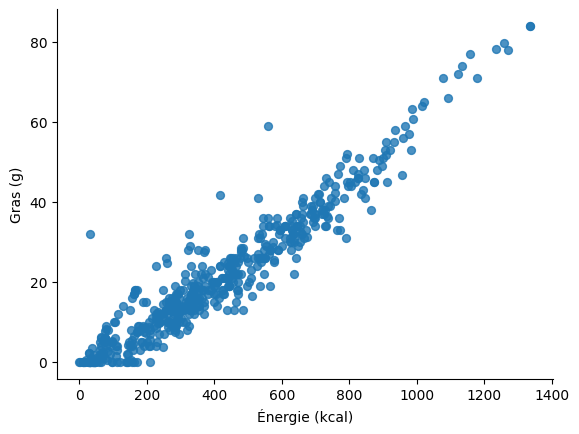

In [46]:
# @title Énergie (kcal) vs Gras (g)

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='Énergie (kcal)', y='Gras (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
combined_df.dtypes

Nom du produit       object
Énergie (kcal)      float64
Gras (g)            float64
Gras Saturés (g)    float64
Glucides (g)        float64
Sucre (g)           float64
Fibre (g)           float64
Protéine (g)        float64
Sel (g)             float64
Catégorie            object
Enseigne             object
dtype: object

In [41]:
# Quel accompagnement est le plus calorique ?

# Filtrer les données pour la catégorie "Accompagnement"
accompagnements = combined_df[combined_df['Catégorie'] == 'Accompagnement']

# Trouver l'accompagnement le plus calorique par enseigne
accompagnements_max_kcal_par_enseigne = accompagnements.groupby('Enseigne').apply(lambda x: x.nlargest(1, 'Énergie (kcal)'))

# Affiche le résultat
accompagnements_max_kcal_par_enseigne

,,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
Enseigne,,,,,,,,,,,,
Burger King,322,King Fries Cheese & Bacon,538.0,26.0,11.0,66.0,2.3,-1.0,12.0,1.8,Accompagnement,Burger King
KFC,465,Kentucky Fries,662.0,39.0,10.0,61.0,3.0,5.0,15.0,2.0,Accompagnement,KFC
McDonald's,1,Frites (Grande),434.0,21.0,2.0,54.0,0.5,5.3,5.1,1.8,Accompagnement,McDonald's


In [43]:
# Quel dessert est le moins sucré ?

# Effectue la requête pour obtenir l'élément avec la plus petite valeur de sucre dans la catégorie 'Dessert'
desserts = combined_df[(combined_df['Catégorie'] == 'Dessert') & (combined_df['Sucre (g)'] != -1)]
dessert_min_sucre = desserts.groupby('Enseigne').apply(lambda x: x.nsmallest(1, 'Énergie (kcal)')) # On ne prend pas en compte les valeurs -1 qui correspondent à des valeurs manquantes

# Affiche le résultat
dessert_min_sucre

,,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
Enseigne,,,,,,,,,,,,
Burger King,439,Kroc Pom,32.0,0.0,-1.0,7.2,7.1,-1.0,0.2,0.0,Dessert,Burger King
KFC,489,Sundae Nature,148.0,5.0,3.6,24.0,19.0,0.0,2.8,0.2,Dessert,KFC
McDonald's,201,P'tite Nectarine,26.0,0.0,0.0,5.0,5.0,1.0,1.0,0.0,Dessert,McDonald's


In [37]:
#Quel sont les 5 plats les plus protéinés ?

# Effectue la requête pour obtenir les 5 éléments avec les plus grandes valeurs de protéine dans la catégorie 'Plat'
plats_max_proteine = combined_df[(combined_df['Catégorie'] == 'Plat')].nlargest(5, 'Protéine (g)')

# Affiche le résultat
plats_max_proteine

,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
215,Signature Triple Cheddar,1336.0,84.0,43.0,55.0,15.0,4.0,88.0,5.30,Plat,McDonald's
294,Triple Cheddar Double Beef,1336.0,84.0,43.0,55.0,15.0,4.0,88.0,5.30,Plat,McDonald's
313,Double Cheddar & Smoky Bacon,1270.0,78.0,38.0,55.0,15.0,4.0,85.0,12.25,Plat,McDonald's
411,Master Double Cantal,1257.0,79.7,25.1,61.5,11.5,-1.0,73.0,9.25,Plat,Burger King
442,Double Stacker King,1076.0,71.0,32.0,38.0,11.0,-1.0,68.0,3.90,Plat,Burger King


In [39]:
# On définit une fonction pour calculer la moyenne en ignorant la valeur -1
def mean(values):
    values = [value for value in values if value != -1]
    if values:
        return np.mean(values)
    else:
        return np.nan  # On retourne NaN si toutes les valeurs sont -1 ou si la liste est vide

# On définit une fonction pour calculer le maximum en ignorant la valeur -1
def max(values):
    values = [value for value in values if value != -1]
    if values:
        return np.max(values)
    else:
        return np.nan # On retourne NaN si toutes les valeurs sont -1 ou si la liste est vide

# On définit une fonction pour calculer le minimum en ignorant la valeur -1
def min(values):
    values = [value for value in values if value != -1]
    if values:
        return np.min(values)
    else:
        return np.nan  # On retourne NaN si toutes les valeurs sont -1 ou si la liste est vide

In [49]:
# Sélectionner toutes les colonnes sauf la première et les deux dernières
colonnes_a_analyser = combined_df.columns[1:-2]

# Calculer la moyenne, le minimum (en ignorant les valeurs -1) et le maximum pour chaque catégorie et chaque enseigne
resultats_finaux = combined_df.groupby(['Catégorie', 'Enseigne'])[colonnes_a_analyser].agg([('mean', lambda x: mean(x)), ('min', lambda x: min(x)), ('max', lambda x: max(x))])

resultats_finaux

Énergie (kcal)                  Gras (g)       \
                                     mean    min     max       mean  min   
Catégorie      Enseigne                                                    
Accompagnement Burger King     288.333333   35.0   538.0  14.158333  0.5   
               KFC             293.714286   12.0   662.0  14.714286  0.0   
               McDonald's      230.333333   15.0   434.0  11.816667  0.0   
Boisson        KFC              82.000000    1.0   163.0   0.000000  0.0   
               McDonald's      110.636364    0.0   210.0   0.009091  0.0   
Dessert        Burger King     266.192308   32.0   484.0  10.719231  0.0   
               KFC             324.500000  148.0   447.0  16.233333  5.0   
               McDonald's      230.083333   26.0   595.0   9.671429  0.0   
Plat           Burger King     634.077778   32.0  1257.0  36.489667  9.8   
               KFC             491.754717   63.0  1156.0  25.263208  2.0   
               McDonald's      525.893258   75.0  1336.0  26.619101  1.0   
Sauce          Burger King     156.111111   36.0   417.0  12.966667  0.0   
               KFC             119.444444   12.0   325.0  10.877778  0.0   
               McDonald's      118.250000   13.0   559.0   9.807143  0.0   

                                 Gras Saturés (g)            Glucides (g)  \
                             max             mean  min   max         mean   
Catégorie      Enseigne                                                     
Accompagnement Burger King  32.0         4.181818  0.0  11.0    35.558333   
               KFC          39.0         2.285714  0.0  10.0    28.428571   
               McDonald's   22.0         1.787500  0.0   6.0    25.961111   
Boisson        KFC           0.0         0.000000  0.0   0.0    21.000000   
               McDonald's    0.1         0.000000  0.0   0.0    27.218182   
Dessert        Burger King  31.0         5.172000  0.5  22.5    37.811538   
               KFC          26.0         9.050000  1.8  17.0    40.225000   
               McDonald's   33.0         4.143077  0.0  16.0    31.223810   
Plat           Burger King  79.7        12.852500  0.0  33.0    44.972667   
               KFC          77.0         5.745721  0.0  18.0    37.100377   
               McDonald's   84.0         9.143582  0.0  43.0    42.970787   
Sauce          Burger King  41.7         1.355556  0.0   5.1     4.255556   
               KFC          32.0         1.216667  0.0   3.0     5.066667   
               McDonald's   59.0         1.126087  0.0   8.6     7.132143   

                            ... Sucre (g) Fibre (g)            Protéine (g)  \
                            ...       max      mean  min   max         mean   
Catégorie      Enseigne     ...                                               
Accompagnement Burger King  ...       5.4       NaN  NaN   NaN     5.825000   
               KFC          ...       4.0  2.714286  1.0   5.0     8.000000   
               McDonald's   ...      10.0  3.626667  0.8   9.5     3.711111   
Boisson        KFC          ...      42.0       NaN  NaN   NaN     0.000000   
               McDonald's   ...      53.0  0.033333  0.0   0.2     0.290909   
Dessert        Burger King  ...      60.7       NaN  NaN   NaN     4.492308   
               KFC          ...      49.0  1.225000  0.0   3.0     4.308333   
               McDonald's   ...      66.0  1.204762  0.0   8.0     4.246429   
Plat           Burger King  ...      20.0       NaN  NaN   NaN    32.326000   
               KFC          ...      18.3  3.279070  0.0   8.0    28.300189   
               McDonald's   ...      56.0  2.973826  0.0  11.0    27.003933   
Sauce          Burger King  ...       8.0       NaN  NaN   NaN     0.533333   
               KFC          ...       8.0  0.125000  0.0   0.4     0.300000   
               McDonald's   ...      30.0  0.143750  0.0   1.0     0.557143   

                                        Sel (g)               
                 

In [48]:
# Comparaison BigMac et Whopper

burgers = combined_df[(combined_df['Nom du produit'] == 'Whopper') | (combined_df['Nom du produit'] == 'Big Mac')]
burgers

,Nom du produit,Énergie (kcal),Gras (g),Gras Saturés (g),Glucides (g),Sucre (g),Fibre (g),Protéine (g),Sel (g),Catégorie,Enseigne
5,Big Mac,530.0,27.0,9.6,42.0,7.8,3.1,27.0,2.30,Plat,McDonald's
329,Whopper,629.0,35.2,9.4,48.5,11.7,-1.0,28.2,6.25,Plat,Burger King
